In [1]:
# Importar bibliotecas necesarias
import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Ruta al dataset descargado
dataset_path = "Garbage classification" 

# 1. Cargar el dataset y explorar carpetas
def explorar_dataset(path):
    clases = os.listdir(path)
    print(f"Clases disponibles: {clases}")
    total_imagenes = 0
    distribucion = {}
    for clase in clases:
        clase_path = os.path.join(path, clase)
        imagenes = os.listdir(clase_path)
        distribucion[clase] = len(imagenes)
        total_imagenes += len(imagenes)
    print(f"Total de imágenes: {total_imagenes}")
    return distribucion

distribucion = explorar_dataset(dataset_path)

Clases disponibles: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Total de imágenes: 2527


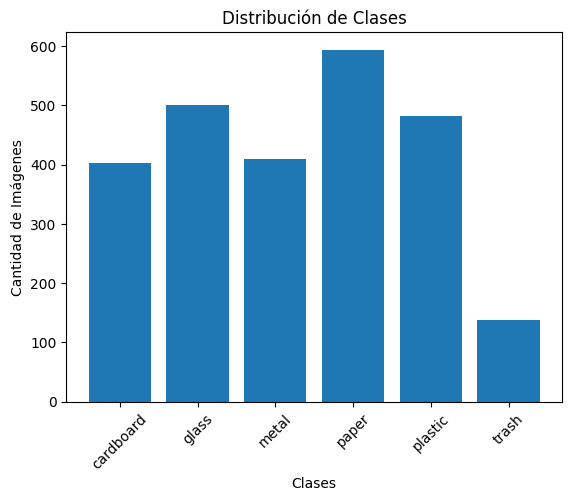

In [2]:
# 2. Visualizar la distribución de clases
def visualizar_distribucion(distribucion):
    clases, cantidades = zip(*distribucion.items())
    plt.bar(clases, cantidades)
    plt.xlabel('Clases')
    plt.ylabel('Cantidad de Imágenes')
    plt.title('Distribución de Clases')
    plt.xticks(rotation=45)
    plt.show()

visualizar_distribucion(distribucion)

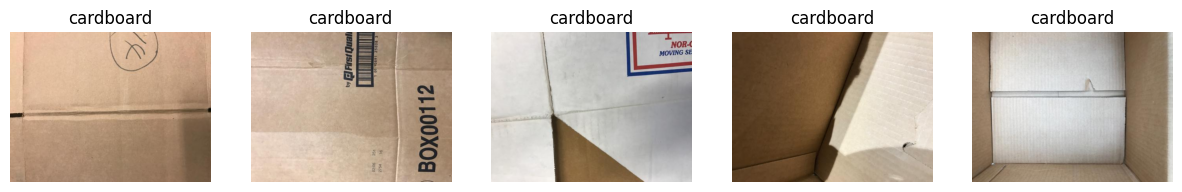

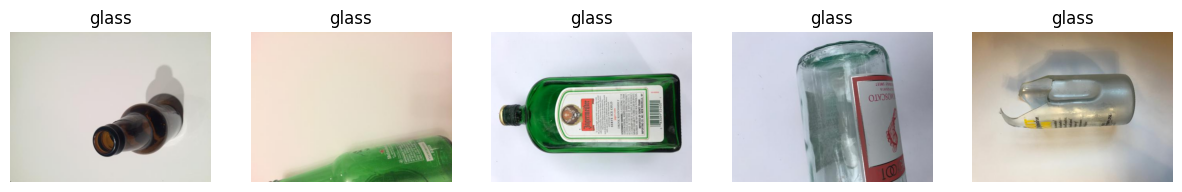

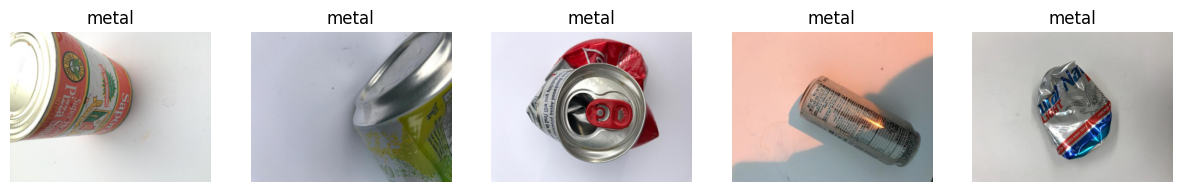

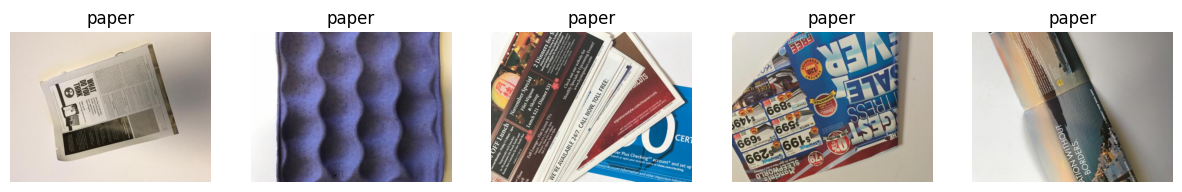

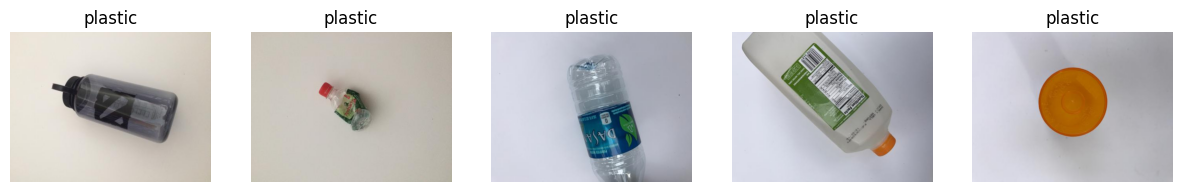

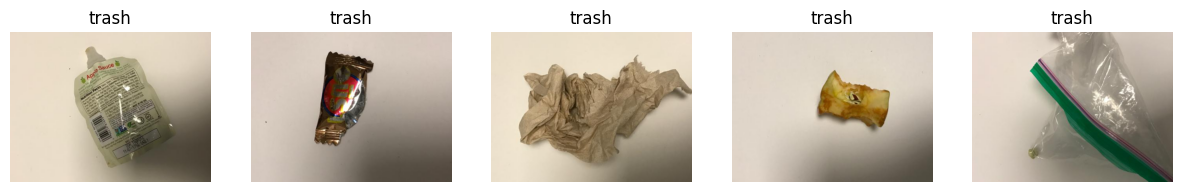

In [3]:
# 3. Mostrar ejemplos de imágenes
def mostrar_imagenes(path, clase, num_imagenes=5):
    clase_path = os.path.join(path, clase)
    imagenes = os.listdir(clase_path)[:num_imagenes]
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(imagenes):
        img_path = os.path.join(clase_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_imagenes, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(clase)
    plt.show()

# Mostrar imágenes de cada clase (muestra un ejemplo por clase)
for clase in distribucion.keys():
    mostrar_imagenes(dataset_path, clase)

In [6]:
# Importar bibliotecas necesarias
import os

# Ruta al dataset descargado
dataset_path = "Garbage classification"

# Función para contar imágenes por categoría
def contar_imagenes_por_categoria(path):
    clases = os.listdir(path)
    conteo_categorias = {}
    for clase in clases:
        clase_path = os.path.join(path, clase)
        if os.path.isdir(clase_path):  # Asegurarse de que sea un directorio
            num_imagenes = len([f for f in os.listdir(clase_path) if os.path.isfile(os.path.join(clase_path, f))])
            conteo_categorias[clase] = num_imagenes
    return conteo_categorias

# Obtener y mostrar el conteo
conteo = contar_imagenes_por_categoria(dataset_path)

# Mostrar el conteo en consola
print("Conteo de imágenes por categoría:")
for categoria, cantidad in conteo.items():
    print(f"{categoria}: {cantidad} imágenes")

Conteo de imágenes por categoría:
cardboard: 403 imágenes
glass: 501 imágenes
metal: 410 imágenes
paper: 594 imágenes
plastic: 482 imágenes
trash: 137 imágenes


Aumentando la clase 'cardboard' de 403 a 594 imágenes...
Aumentando la clase 'glass' de 501 a 594 imágenes...
Aumentando la clase 'metal' de 410 a 594 imágenes...
Aumentando la clase 'paper' de 594 a 594 imágenes...
Aumentando la clase 'plastic' de 482 a 594 imágenes...
Aumentando la clase 'trash' de 137 a 594 imágenes...

Nuevo conteo de imágenes por categoría después de la aumentación:
cardboard: 594 imágenes
glass: 594 imágenes
metal: 594 imágenes
paper: 594 imágenes
plastic: 594 imágenes
trash: 594 imágenes


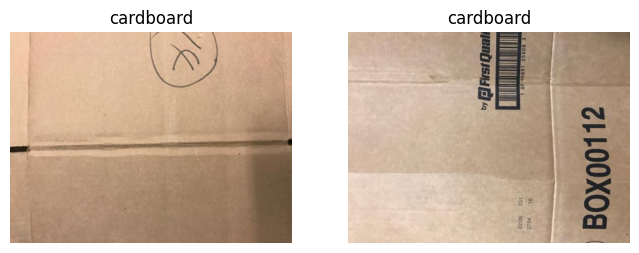

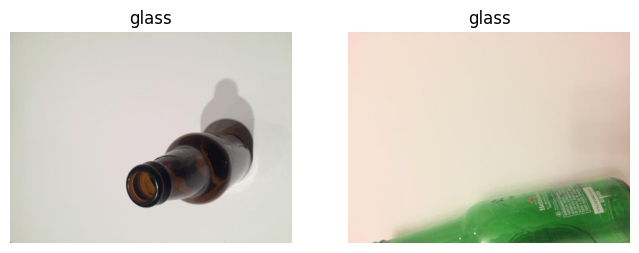

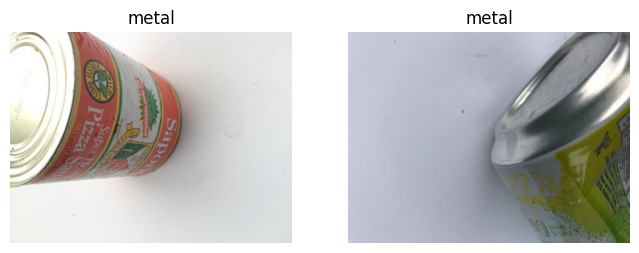

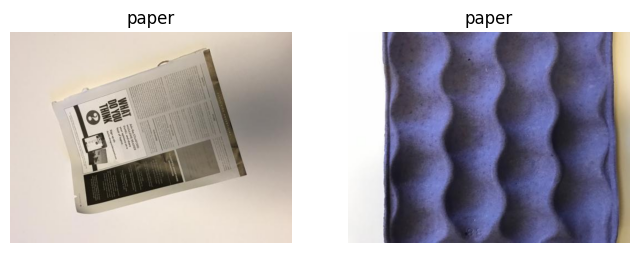

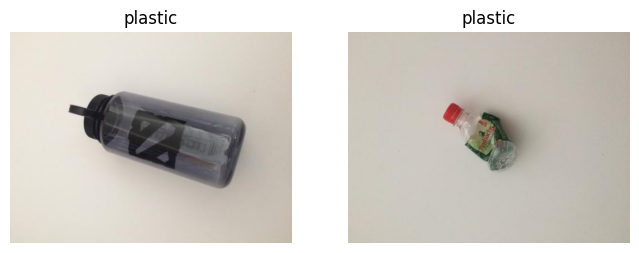

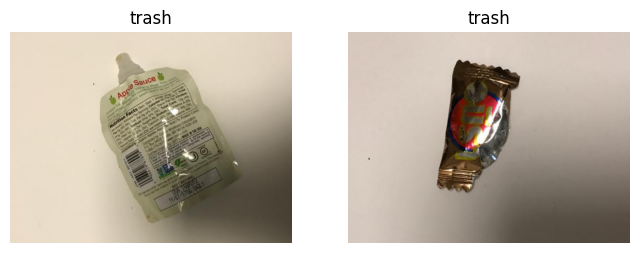

In [8]:
from PIL import Image, ImageOps
import random
import os

# Función para aumentar las imágenes en cada categoría
def aumentar_imagenes(dataset_path, max_images=594):
    clases = os.listdir(dataset_path)
    for clase in clases:
        clase_path = os.path.join(dataset_path, clase)
        if os.path.isdir(clase_path):
            imagenes = os.listdir(clase_path)
            num_actual = len(imagenes)
            print(f"Aumentando la clase '{clase}' de {num_actual} a {max_images} imágenes...")
            
            while num_actual < max_images:
                # Elegir una imagen al azar para aumentación
                img_name = random.choice(imagenes)
                img_path = os.path.join(clase_path, img_name)
                with Image.open(img_path) as img:
                    # Realizar transformaciones aleatorias
                    transformacion = random.choice(["flip", "rotate"])
                    if transformacion == "flip":
                        img_aumentada = ImageOps.mirror(img)
                    elif transformacion == "rotate":
                        img_aumentada = img.rotate(random.choice([90, 180, 270]))
                    
                    # Guardar la imagen aumentada
                    nueva_imagen_nombre = f"{clase}_{num_actual}.jpg"
                    nueva_imagen_path = os.path.join(clase_path, nueva_imagen_nombre)
                    img_aumentada.save(nueva_imagen_path)
                    
                    # Actualizar el contador
                    num_actual += 1

# Ruta del dataset
dataset_path = "Garbage classification"  # Cambia esto a tu ruta real

# Aumentar imágenes en todas las categorías
aumentar_imagenes(dataset_path)

# Verificar conteo después de la aumentación
conteo_post_aumentacion = contar_imagenes_por_categoria(dataset_path)

# Mostrar el nuevo conteo
print("\nNuevo conteo de imágenes por categoría después de la aumentación:")
for categoria, cantidad in conteo_post_aumentacion.items():
    print(f"{categoria}: {cantidad} imágenes")

# Mostrar 2 imágenes por categoría
def mostrar_dos_imagenes_por_categoria(path, categorias):
    for clase in categorias:
        clase_path = os.path.join(path, clase)
        imagenes = os.listdir(clase_path)[:2]
        plt.figure(figsize=(8, 4))
        for i, img_name in enumerate(imagenes):
            img_path = os.path.join(clase_path, img_name)
            img = Image.open(img_path)
            plt.subplot(1, 2, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(clase)
        plt.show()

mostrar_dos_imagenes_por_categoria(dataset_path, conteo_post_aumentacion.keys())